# Individual Plan

[Github link](https://github.com/Dreamsilence1/DSCI-100-Individual-Plan)  
https://github.com/Dreamsilence1/DSCI-100-Individual-Plan

## Importing data

In [1]:
library(tidyverse)
url = 'https://drive.google.com/uc?export=download&id=1ONggpBJwD2KezShjKRUqMj2Rxf5ibP0J'
players <- read_csv(url)
head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [2]:
distinct(players, experience)
distinct(players, subscribe)
distinct(players, gender)
players |> summarize(max(played_hours), min(played_hours), max(Age), min(Age))

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


max(played_hours),min(played_hours),max(Age),min(Age)
<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,NA,NA


## Data Description
There are 196 obervations and 7 variables, the varibales are:
1. `experience`, charactor, describes the experience level of the players, as: `Pro`, `Veteran`, `Amateur`, `Regular`, and `Beginner`.
2. `subscribe`, logical, describes whether or not the player has subscribed the game info, as: `TRUE`, and `FALSE`
3. `hashedEmail`, charactor, this records the hashing encoded email addresses of players.
4. `played_hours`, double, records the game playtime in hours, with a range from 0 to 99.
5. `name`, character, a pseudonym assigned to each player. This variable does not contain real names, and is used only for identification within the dataset.
6. `gender`, character, records the gender identity of each player. Values include: `Male`, `Female`, `Non-binary`, `Agender`, and `Prefer not to say`.
7. `Age`, numeric, records the age of each player in years. The values range approximately from 9 to 58 years old.

### Potential issues

In [3]:
players |> group_by(gender) |> summarize(count=n())

gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


1. The `hashedEmail` variable contains anonymized identifiers that cannot be meaningfully interpreted. Since it does not provide analytical value on its own, this column is likely not useful except for linking the players and sessions datasets.

2. If we plan to use `experience` as a predictor, it cannot be used directly in its current categorical form. It would need to be encoded into a numerical representation—one-hot encoding is one appropriate approach.

3. The categories `Agender`, `Other`, and `Two-Spirited` appear very infrequently compared with `Male` and `Female`. If we choose to use `gender` as a predictor or response variable, it may be necessary to merge these small groups into a single “Other” category

## Data visualization

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


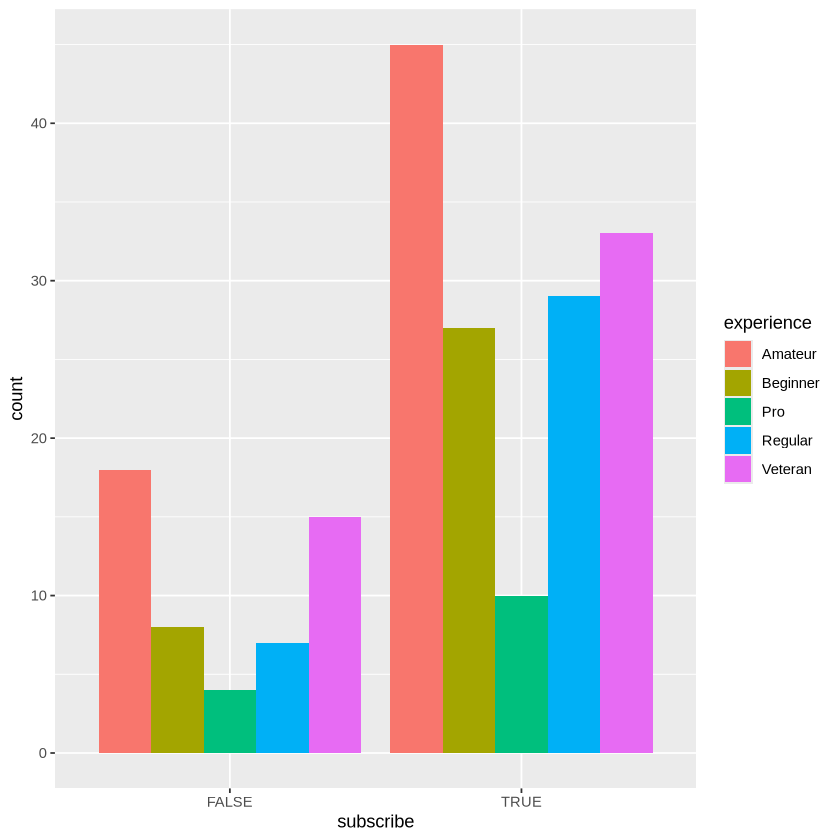

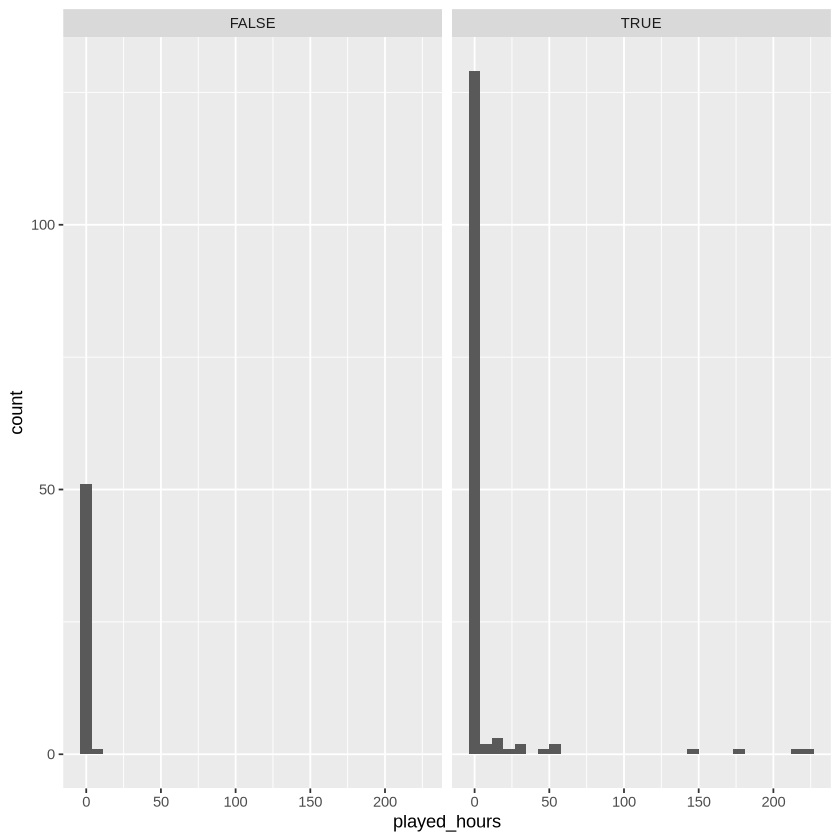

gender,max,min,avg
<chr>,<dbl>,<dbl>,<dbl>
Agender,12.5,0.0,6.25000000
Female,178.2,0.0,10.63513514
Male,223.1,0.0,4.12741935
Non-binary,218.1,0.0,14.88000000
Other,0.2,0.2,0.20000000
Prefer not to say,2.0,0.0,0.37272727
Two-Spirited,0.4,0.0,0.08333333


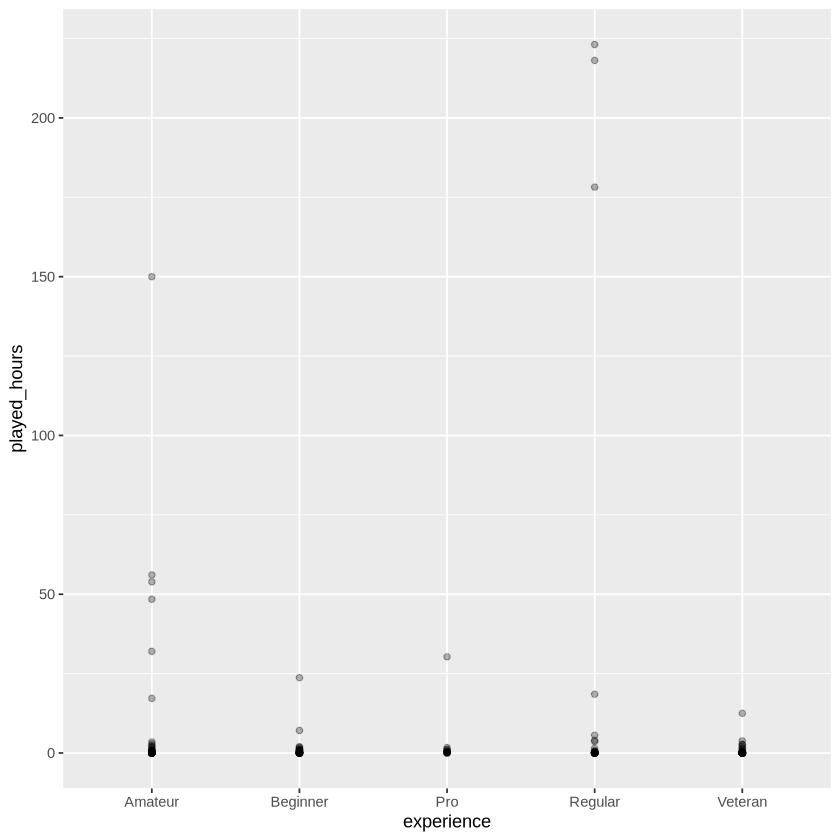

In [4]:
ggplot(players, aes(x=subscribe)) + geom_bar(aes(fill=experience), position="dodge")

ggplot(players, aes(x=played_hours)) + geom_histogram() + facet_grid(cols = vars(subscribe))

ggplot(players, aes(x=experience, y=played_hours)) + geom_point(alpha=0.3)

players |> group_by(gender) |>
summarize(max = max(played_hours), min = min(played_hours), avg = mean(played_hours))

#### 1. Experience vs. Subscription

A bar plot of `subscribe` across different experience levels shows that players who is  Amateurs, Regular and Veteran tend to have a larger proportion of subscribers compared with Beginners and Pro.  

#### 2. Played Hours vs. Subscription

The histogram of `played_hours` faceted by subscription status indicates that:
- Both subscribers and non-subscribers have the majority of players clustered near very low playtime (0–5 hours).
- However, **subscribers exhibit significantly more high-playtime outliers** (e.g., 50+, 150+, even 200+ hours), whereas non-subscribers do not.

#### 3. Experience vs. Played Hours

The scatter plot of `experience` vs. `played_hours` shows that:
- All experience groups contain many players with low playtime, but
- Higher-experience groups (Regular, Veteran) also include the extremely high-playtime outliers (150–220 hours).

#### 4. Gender Summary Table

The summary table of `played_hours` by gender shows:
- Male, Female, and Non-binary players all have high maxima (178–223 hours).
- Other gender categories (Agender, Other, Two-Spirited, Prefer not to say) have extremely small sample sizes and very low playtime.

## Selected Question
I will answer **question 1**: `What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and  how do these features differ between various player types?`  

### Specific Question

Can `experience`, `played_hours`, `age`, and `gender` predict whether a player chooses to `subscribe` ?

This is a **k-nearest neighbors (kNN) classification** problem because the response variable `subscribe` is categorical. Additionally, the predictor `experience` needs to be converted into a numerical form before applying the classification algorithm.

There are two ways I can come up when process `experience`, and each of them has its own limitations. 
 
**one-hot encoding** can convert `experence` into 5 columns: `Pro`, `Veteran`, `Amateur`, `Regular`, and `Beginner`, each with values 0 and 1. the limitation is that it increases dimensionality and cannot represent any natural order among categories, which may lead to sparsity and less efficient models, especially when the number of categories is large.  

**ordinary encoding** keeps `experience` as one column, and assign values to it context as: `pro`=5, `Veteran`=4, `Amateur`=3, `Regular`=2, `Beginner`=1. the limitation is that it forces an artificial numerical order and distance between categories which may introduce bias if the categories do not truly have a meaningful ranking or equal spacing.

I will divide the dataset into a 75% *training* set and a 25% *testing* set.  
Next, I will use **cross-validation** to **tune the value of k** and identify the optimal number of neighbors for the classifier.  After selecting the best k, I will train the model on the *training* set and then evaluate its accuracy on the *testing* set to assess its performance and discuss potential improvements.